In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import ifft
from numpy.polynomial.legendre import leggauss
from scipy import special
from scipy.integrate import quadrature
from scipy import interpolate
import scipy.integrate as integrate

### Problem 1 Fit the signal that loads below using the DFT. Display the resulting fit by overlaying it on the data.

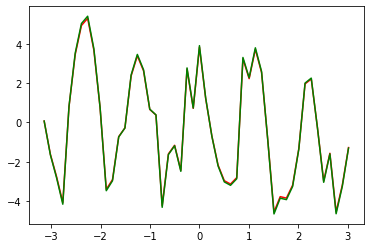

In [2]:
# Your code for Problem 1 in this cell. Add cells as required.
# Make sure that the signal.npy file is in the same directory as this Jupyter notebook.
# If you still have trouble loading it, copy and paste the array, from the text file provided,
# into a cell above.

# *** Provide collocation code here ***
signal = np.load('signal.npy')
N = len(signal)
Nk = N
#print(Nk)
x = np.linspace(-np.pi,np.pi,N+1)
x = x[:-1]
k = np.arange(-Nk/2+1,Nk/2+1) # Recall arange leaves out last value
# Outer Product for Fitting
kx = np.outer(k,x)
C = np.cos(np.outer(k,x))
S = np.sin(np.outer(k,x))
a = C.dot(signal)/(N-1)
b = S.dot(signal)/(N-1)
Hc = a.dot(C)
Hs = b.dot(S)
H = Hc + Hs

# Interpolate
#xi = np.linspace(-np.pi,np.pi)
#Ni = len(xi)
#kxi = np.outer(k,xi) # Outer Product for Interpolating
#Ci = np.cos(kxi)
#Si = np.sin(kxi)
#Hci = a.dot(Ci) # Cosine (even part) Interpolant
#Hsi = b.dot(Si) # Sine (odd part) Interpolant
# Construct the Fourier series expansion
#Hi = Hci + Hsi # Trigonometric (DFT) Interpolation
plt.plot(x,signal,'r-',x,H,'g-');

### Problem 2 Find $x$ such that $\sin(x^2) = \frac1{\pi}\int_0^\pi\sin(t^2)\,dt$.

In [15]:
# Your code for Problem 5 in this cell. Add cells as required.
result = integrate.quad(lambda x: 1/np.pi*np.sin(x**2), 0, np.pi)
print(result[0])
#THIS IS USING SECANT METHOD 

0.24594267872608572


In [4]:
def g(x):
    #return ((1/np.pi)*np.sin(x**2))-np.sin(x**2)
    return np.sin(x**2)-result[0]

In [5]:
def gp(x):
    return (2*x)*np.cos(x**2)

In [6]:
x = 3
MAXITS = 20
tol = 1e-8
k = 0
err = 1

while err > tol and k < MAXITS:
    eta = g(x)/gp(x)
    #xold = x
    x = x - eta
    err = np.fabs(eta)
    k +=1
    
print(x)
print(err)
print(k)

3.029238491239321
1.4194916250773387e-12
4


### Problem 3 Use Chebyshev nodes to interpolate the function $f(x) = \frac{1}{1+25x^2}$ on the interval $[-1,1]$.

In [7]:
# Your code for Problem 6 in this cell. Add cells as required.

In [8]:
def f(x):
    return 1/(1+25*x**2)

In [9]:
def transint(x,w,a,b):
    x = (b-a)*(x + (a+b)/(b-a))/2
    w = (b-a)*w/2
    return x,w

In [10]:
def clencurt(n1):
    n = n1 - 1
    C = np.zeros((n1,2))
    k = 2*(1+np.arange(np.floor(n/2)))
    # Compute weights --> integral of Tn(x)
    C[::2,0] = 2/np.hstack((1, 1-k*k))
    C[1,1] = -n
    V = np.vstack((C,np.flipud(C[1:n,:])))
    # Real part of inverse FFT ~ Cosine transform
    F = np.real(ifft(V, n=None, axis=0))
    x = F[:n1,1]
    w = np.hstack((F[0,0],2*F[1:n,0],F[n,0]))
    return x, w

In [11]:
def myclencurt(N, func, a = -1, b = 1):
    x, w = clencurt(N)
    x, w = transint(x,w,a,b)
    return w.dot(func(x))

In [12]:
myclencurt(N,f)

0.5493603025358971

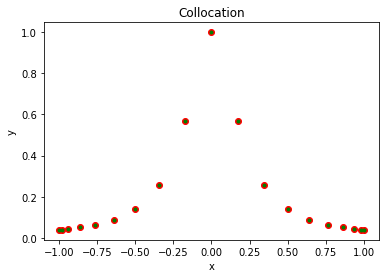

In [13]:
nodes = 19
x,w = clencurt(nodes)
phi= np.vander(x,N=nodes,increasing=True)
c = np.linalg.solve(phi,f(x))
y=np.dot(phi,c)
plt.plot(x,f(x),'ro',x,y,'g.')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Collocation');

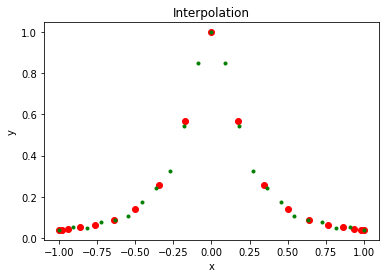

In [14]:
Ni = 23
xi = np.linspace(-1,1,Ni)
phitwo = np.vander(xi,N=nodes,increasing=True)
yi=np.dot(phitwo,c)
plt.plot(x,f(x),'ro',xi,yi,'g.')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolation');